# STAT 542 - Statistical Learning

# Homework 8 - Manan Mehta (mananm2)

## Due: 10/26/2020

## About HW8

We practice two main tools: PCA and $k$-means. For $k$-means, you need to code your own algorithm. For PCA, understand how to perform prediction using the rotation matrix and effectively reduce the dimension. 

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist

from sklearn import datasets
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

## Question 1 (50 Points) Implement the K-Means Algorithm

Write your own code of k-means. The algorithm essentially performs the following:

  * Initialize cluster means or cluster membership
  * Iterate between the updates of cluster means and membership
  * Output the results when they do not change anymore
  
You should consider the following while writing the algorithm:

  * Avoiding over-use of for-loop such that your code can be applied to data with larger size (in question 2)
  * [10 points] You should further consider multiple starting values and compare the within-cluster distances to pick the best
  * [15 points] Compare your results with a built-in $k$ means algorithm, e.g., `kmeans()`, on the `iris` data. Make sure that you understand the iris data. For both your code and the built-in function, use $k=3$. Try 1 and 20 random starts and compare the results with different seeds. Do you observe any difference? What is the cause of the difference?

In [2]:
iris = datasets.load_iris()
X , y = iris.data , iris.target
k = 3

In [3]:
def kmeansClustering(X, k = 3, tol = 1e-08, n_random_starts = 10):    
    '''
    Algorithm for K-means Clustering on a feature input
    
    Inputs:
    - X               : feature values to be clustered (n x p)
    - k               : number of clusters
    - tol             : tolerance for norm of the difference in the cluster centers of 
                        two consecutive iterations to declare convergence
    - n_random_starts : number of random starts for cluster centers
                        iteration with minimum within-cluster distance is output
                        
    Outputs:
    - clusters       : array of clusters formed (n x 1) with integer entries from range(0,k)
    - centers        : cluster centers (k x p)
    - min_clust_dist : sum of squared distances of samples to their closest cluster center
    
    '''
    min_clust_dist = 1e08

    for run in range(n_random_starts):    

        center_indices = np.random.randint(0, len(X), size = k)
        centers = X[center_indices]

        previous_centers = np.zeros([centers.shape[0], centers.shape[1]])

        while np.linalg.norm(previous_centers - centers) > tol :
            distmat = cdist(X, centers)
            clusters = np.argmin(distmat, axis = 1)
            previous_centers = np.copy(centers)
            for i in range(k):
                centers[i] = np.mean( X[clusters == i] , axis = 0 )

        within_clust_dist = np.sum( (np.min(distmat, axis = 1))**2 )

        if within_clust_dist < min_clust_dist:
            clusters_to_return = np.copy(clusters)
            centers_to_return = np.copy(centers)        
            min_clust_dist = within_clust_dist

    return clusters_to_return, centers_to_return, min_clust_dist

Results from our algorithm:

In [4]:
kmeansClustering(X, k = 3, tol = 1e-08, n_random_starts = 10)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64),
 array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
        [5.006     , 3.428     , 1.462     , 0.246     ],
        [6.85      , 3.07368421, 5.74210526, 2.07105263]]),
 78.85144142614601)

Results from scikit-learn:

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3).fit(X)
km.labels_ , km.cluster_centers_ , km.inertia_

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
        2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0]),
 array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
        [5.006     , 3.428     , 1.462     , 0.246     ],
        [6.85      , 3.07368421, 5.74210526, 2.07105263]]),
 78.85144142614601)

We see that the results match.

On trying different random starts and different seeds, we see that the resulting cluster allocations change. This is because the K-Means clustering algorithm is sensitive to the choice of the initial cluster centers. This, however, is not observed in the scikit-learn implementation as it uses k-means++ for intelligent initialization of cluster centers.

## Question 2 (50 Points) Clustering, Classification and Dimension Reduction

Although clustering is an unsupervised algorithm, it may sometimes reveal the underlying true (unobserved) label associated with each observation. For this question, apply your K means clustering algorithm on the handwritten digit data (`zip.train` from the `ElemStatLearn` package). We only use digits 1, 4 and 8.

In [6]:
digits_train , digits_test = np.loadtxt('zip.train') , np.loadtxt('zip.test')
train_df , test_df = pd.DataFrame(digits_train) , pd.DataFrame(digits_test)

#only use the digits 1, 4, 8
train_df = train_df[(train_df[0] == 1.0) | (train_df[0] == 4.0) | (train_df[0] == 8.0)]
test_df = test_df[(test_df[0] == 1.0) | (test_df[0] == 4.0) | (test_df[0] == 8.0)]

#Split the data into training and test
X_train, y_train = train_df.values[:,1:], train_df.values[:,0]
X_test, y_test  = test_df.values[:,1:], test_df.values[:,0]

In [7]:
km = kmeansClustering(X_train, k = 3)
clusters , cluster_centers = list(km[0]) , km[1]

**Given your clustering results, how to assign a label to each cluster?**

We assign label to each cluster using the obtained cluster centers and the training labels. Since we have labelled training data, we find the cluster centers of the labelled training data and see how much they differ from the obtained cluster centers. The reults can be obtained in terms of a $k \times k$ matrix, where the rows indicate the labels and the columns indicate the cluster. There is a distinctly similar element (smaller norm) in each column, which denotes the mapping.

In [8]:
labels = [1.0, 4.0, 8.0]
mapmat = np.zeros([len(labels),k])
for i in range(len(labels)):
    for j in range(k):
        mapmat[i,j] = np.linalg.norm(np.mean(X_train[train_df[0] == labels[i]], axis = 0) - cluster_centers[j])
print(np.round(mapmat , 2))

[[10.15 10.13  0.25]
 [ 7.23  0.45  9.54]
 [ 0.35  7.1   9.75]]


Hence, we can save the mapping in a dictionary:

In [9]:
mapdict = {}
for i in range(k):
    mapdict[i] = labels[ np.argmin(mapmat , axis = 0)[i] ]
print(mapdict)

{0: 8.0, 1: 4.0, 2: 1.0}


**With your assigned cluster, how to predict the label on the `zip.test` data?**

To predict a label on the test data, we predict the cluster using obtained cluster centers, and then map the data back using the above dictionary.

In [10]:
distmat = cdist(X_test, cluster_centers)
predicted_clusters = np.argmin(distmat, axis = 1)
predicted_labels = [mapdict[k] for k in predicted_clusters]

**What is the classification error based on your model? A classification error is defined as $\frac{1}{n}\sum_i 1(y_i \neq \hat y_i)$**

In [11]:
err = sum(predicted_labels != y_test)/len(y_test)
print("The Classification Error is {:.4f}".format(err))

The Classification Error is 0.0556


Dimensionality often causes problems in a lot of machine learning algorithms. PCA is an effective way to reduce the dimension without sacrificing the clustering/classification performances. Repeat your analysis doing the following: 

**Process your data using PCA. Plot the data on a two-dimensional plot using the first two PC's. Mark the data points with different colors to represent their digits.**

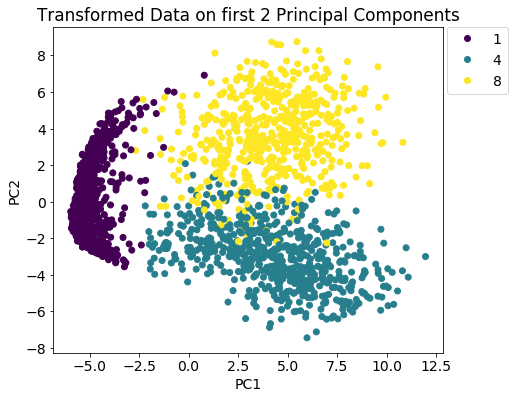

In [12]:
pca = PCA(n_components = 2).fit(X_train)
X_train_pca = pca.transform(X_train)

plt.figure(figsize = (7,6))
scatter = plt.scatter(X_train_pca[:,0], X_train_pca[:,1] , c = y_train)
plt.legend(*scatter.legend_elements(), bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.title('Transformed Data on first 2 Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**Based on the first two PCs, redo the k-means algorithm. Again, assign each cluster a label of the digit, and predict the label on the testing data. You need to do this prediction properly, meaning that your observed testing data is still the full data matrix, and you should utilize the information of PCA from the training data to construct the new features on the reduced dimensions.**

In [13]:
#Training
km_pca = kmeansClustering(X_train_pca, k = 3)
clusters_pca , cluster_centers_pca = list(km_pca[0]) , km_pca[1]

#Mapping
labels = [1.0, 4.0, 8.0]
mapmat_pca = np.zeros([len(labels),k])
for i in range(len(labels)):
    for j in range(k):
        mapmat_pca[i,j] = np.linalg.norm(np.mean(X_train_pca[train_df[0] == labels[i]], axis = 0) - cluster_centers_pca[j])
print(mapmat_pca)
print('\n')

mapdict_pca = {}
for i in range(k):
    mapdict_pca[i] = labels[ np.argmin(mapmat_pca , axis = 0)[i] ]
print(mapdict_pca)

#Transform Xtest
X_test_pca = pca.transform(X_test)

#Prediction
distmat_pca = cdist(X_test_pca, cluster_centers_pca)
predicted_clusters_pca = np.argmin(distmat_pca, axis = 1)
predicted_labels_pca = [mapdict_pca[k] for k in predicted_clusters_pca]

[[ 0.21954723  9.91570387 10.13345291]
 [ 9.42341232  6.77675472  0.49269132]
 [ 9.6386093   0.22225714  6.69603331]]


{0: 1.0, 1: 8.0, 2: 4.0}


**Compare your PCA results with the results obtained by using the entire dataset. How much classification accuracy is sacrificed by using just two dimensions?**

In [14]:
err_pca = sum(predicted_labels_pca != y_test)/len(y_test)
print("The Classification Error is {:.4f}".format(err_pca))

The Classification Error is 0.0825


On comparing the 2 errors:

Classification Error with all 256 features $\mapsto$ **0.056** or **5.6%**

Classification Error with only first 2 PCs $\mapsto$ **0.083** or **8.3%**

Only about **3% accuracy is sacrificed** by using just 2 principal components.